In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [9]:
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt_scores = cross_val_score(dt, X, y, cv=5)
print("Decision Tree CV Accuracy: {:.2f}%".format(np.mean(dt_scores) * 100))

# Random Forest with tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
rf_scores = cross_val_score(best_rf, X, y, cv=5)
print("Random Forest CV Accuracy: {:.2f}%".format(np.mean(rf_scores) * 100))

Decision Tree CV Accuracy: 91.73%
Random Forest CV Accuracy: 95.78%


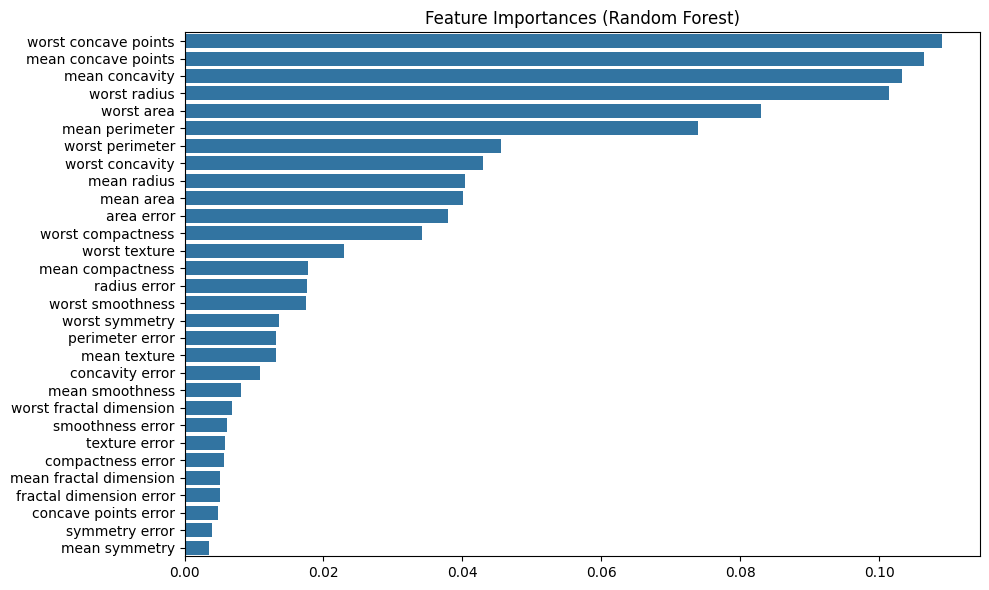

In [11]:
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.tight_layout()
plt.show()

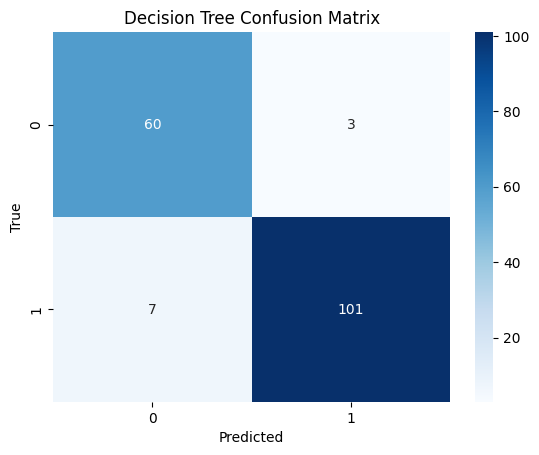

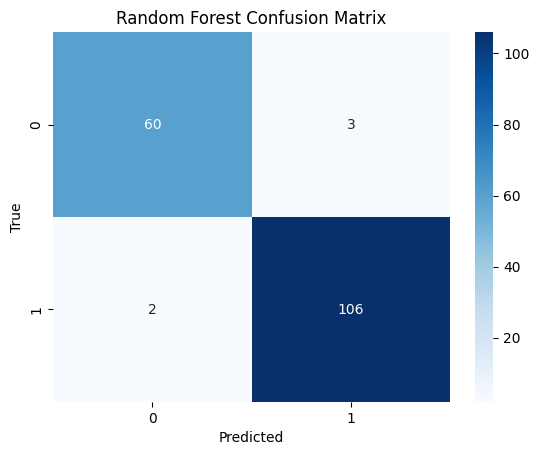

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92        63
           1       0.97      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171

Random Forest Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [12]:
# Fit models
dt.fit(X_train, y_train)
best_rf.fit(X_train, y_train)

# Predict
dt_pred = dt.predict(X_test)
rf_pred = best_rf.predict(X_test)

# Confusion Matrix
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

plot_conf_matrix(y_test, dt_pred, "Decision Tree Confusion Matrix")
plot_conf_matrix(y_test, rf_pred, "Random Forest Confusion Matrix")

# Classification Report
print("Decision Tree Report:\n", classification_report(y_test, dt_pred))
print("Random Forest Report:\n", classification_report(y_test, rf_pred))

In [13]:
def compare_models(X_train, X_test, y_train, y_test):
    dt = DecisionTreeClassifier(random_state=42)
    rf = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', random_state=42)

    dt.fit(X_train, y_train)
    rf.fit(X_train, y_train)

    dt_pred = dt.predict(X_test)
    rf_pred = rf.predict(X_test)

    metrics = {
        'Model': ['Decision Tree', 'Random Forest'],
        'Accuracy': [accuracy_score(y_test, dt_pred), accuracy_score(y_test, rf_pred)],
        'Precision': [precision_score(y_test, dt_pred), precision_score(y_test, rf_pred)],
        'Recall': [recall_score(y_test, dt_pred), recall_score(y_test, rf_pred)],
    }

    print("Model Comparison:")
    for i in range(2):
        print(f"{metrics['Model'][i]} - Accuracy: {metrics['Accuracy'][i]:.2f}, "
              f"Precision: {metrics['Precision'][i]:.2f}, Recall: {metrics['Recall'][i]:.2f}")

In [14]:
compare_models(X_train, X_test, y_train, y_test)

Model Comparison:
Decision Tree - Accuracy: 0.94, Precision: 0.97, Recall: 0.94
Random Forest - Accuracy: 0.97, Precision: 0.96, Recall: 0.99
